In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv('train_Income_Quali.csv')
df_test=pd.read_csv('test_Income_Quali.csv')

In [3]:
#datsets shape
print('Training dataset shape:',df_train.shape)
print('Testing dataset shape:',df_test.shape)

Training dataset shape: (9557, 143)
Testing dataset shape: (23856, 142)


In [4]:
#Q1. Identify the output variable.
for col in df_train.columns:
    if col not in df_test.columns:
        print('Target Variable :',col)

Target Variable : Target


In [5]:
df_train['Target'].value_counts()


4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [6]:
#Q2. Understand datatypes of variables
df_train.dtypes.value_counts()

int64      130
float64      8
object       5
dtype: int64

In [7]:
#float datatypes
float_df=df_train.select_dtypes(include=['float64'])
print(float_df.columns)
float_df.head()


Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
0,190000.0,NaN,NaN,10.0,1.000000,1.000000,0.0,100.0
1,135000.0,1.0,NaN,12.0,1.000000,1.000000,64.0,144.0
2,NaN,NaN,NaN,11.0,0.500000,0.250000,64.0,121.0
3,180000.0,1.0,1.0,11.0,1.333333,1.777778,1.0,121.0
4,180000.0,1.0,NaN,11.0,1.333333,1.777778,1.0,121.0


In [8]:
#object datatypes
object_df=df_train.select_dtypes(include=['object'])
print(object_df.columns)
object_df.head()

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [9]:
# count of members in each household
household = df_train['idhogar'].value_counts()
household = household.rename_axis('idhogar').reset_index(name='MemberCount')
household.head()

,idhogar,MemberCount
0,fd8a6d014,13
1,0c7436de6,12
2,ae6cf0558,12
3,4476ccd4c,11
4,b7a0b59d7,11


In [10]:
household['MemberCount'].value_counts()

3     755
2     688
4     609
1     398
5     315
6     136
7      52
8      12
9      10
10      6
11      4
12      2
13      1
Name: MemberCount, dtype: int64

In [11]:
#treating edjefe and edjefa columns
df_train['edjefe'].value_counts()

no     3762
6      1845
11      751
9       486
3       307
15      285
8       257
7       234
5       222
14      208
17      202
2       194
4       137
16      134
yes     123
12      113
10      111
13      103
21       43
18       19
19       14
20        7
Name: edjefe, dtype: int64

In [12]:
df_train['edjefe'][(df_train['edjefe'] =='no') | (df_train['edjefe'] =='yes')].value_counts().sort_index()


no     3762
yes     123
Name: edjefe, dtype: int64

In [13]:
df_train['edjefe'].replace({'no':0, 'yes':1},inplace=True)
df_train['edjefe'][(df_train['edjefe'] =='no') | (df_train['edjefe'] =='yes')].value_counts().sort_index()


Series([], Name: edjefe, dtype: int64)

In [14]:
#Replacing 'edjefa' column's values
print('Before Replacing',df_train['edjefa'][(df_train['edjefa'] =='no') | (df_train['edjefa'] =='yes')]
      .value_counts().sort_index())
df_train['edjefa'].replace({'no':0, 'yes':1},inplace=True)
print('after replace:',df_train['edjefa'][(df_train['edjefa'] =='no') | (df_train['edjefa'] =='yes')]
      .value_counts().sort_index())

Before Replacing no     6230
yes      69
Name: edjefa, dtype: int64
after replace: Series([], Name: edjefa, dtype: int64)


In [15]:
df_train['dependency'].value_counts()

yes          2192
no           1747
.5           1497
2             730
1.5           713
.33333334     598
.66666669     487
8             378
.25           260
3             236
4             100
.75            98
.2             90
1.3333334      84
.40000001      84
2.5            77
5              24
1.25           18
3.5            18
.80000001      18
2.25           13
.71428573      12
.83333331      11
1.75           11
.22222222      11
1.2            11
.2857143        9
1.6666666       8
.60000002       8
6               7
.16666667       7
Name: dependency, dtype: int64

In [16]:
# SQBDependency distribution based on Dependency 'yes' & 'no'
df_train['SQBdependency'][(df_train['dependency']=='yes')|(df_train['dependency']=='no') ].value_counts()


1.0    2192
0.0    1747
Name: SQBdependency, dtype: int64

In [17]:
print('Before Replacing\n',df_train['dependency'][(df_train['dependency'] =='no') | (df_train['dependency'] =='yes')]
      .value_counts().sort_index())
df_train['dependency'].replace({'no':0, 'yes':1},inplace=True)
print('After Replacing\n',df_train['dependency'][(df_train['dependency'] =='no') | (df_train['dependency'] =='yes')]
      .value_counts().sort_index())

Before Replacing
 no     1747
yes    2192
Name: dependency, dtype: int64
After Replacing
 Series([], Name: dependency, dtype: int64)


In [18]:
#NAN values per column
train_nan = pd.DataFrame(df_train.isnull().sum()).rename(columns={0:'total'})
train_nan['NaN_Percent'] = round(100*(train_nan['total']/df_train.shape[0]),2)
train_nan.sort_values('NaN_Percent',ascending= False ).head(6)

,total,NaN_Percent
rez_esc,7928,82.95
v18q1,7342,76.82
v2a1,6860,71.78
SQBmeaned,5,0.05
meaneduc,5,0.05
Id,0,0.00


Text(0.5, 1.0, 'Fraction Of NaN Values,%')

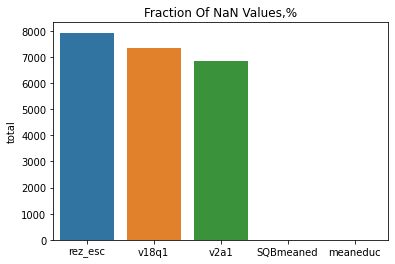

In [19]:
# Taking top 5 columns that have the null values
plot_copy = train_nan.sort_values('NaN_Percent',ascending= False ).head(5)
sns.barplot(y=plot_copy['total'],x=plot_copy.index)
plt.title('Fraction Of NaN Values,%')

Text(0.5, 1.0, 'NaN Distribution Based On Ownership Type')

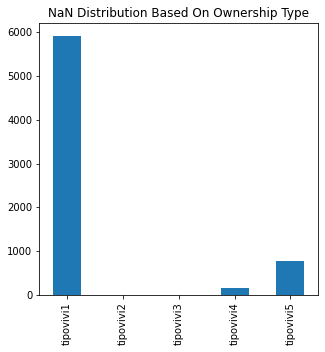

In [20]:
ownership_columns = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
df_train.loc[df_train['v2a1'].isnull(), ownership_columns].sum().plot.bar(figsize=(5,5))
plt.title('NaN Distribution Based On Ownership Type')

In [21]:
#Replacing the v2a1's Nulls with 0
df_train['v2a1'].fillna(value=0, inplace=True)
print('Current Count Of Nulls In v2a1:',df_train['v2a1'].isnull().sum())

Current Count Of Nulls In v2a1: 0


<AxesSubplot:>

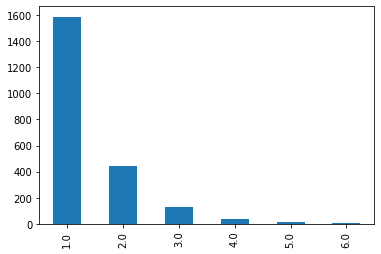

In [22]:
df_train['v18q1'].value_counts().sort_index().plot.bar()

In [23]:
# Returns Number of nulls
def count_null(data):
    return data.isnull().sum()

In [24]:
Household_head = df_train[df_train['parentesco1']==1].copy()
Household_head.groupby('v18q')['v18q1'].apply(count_null)

v18q
0    2318
1       0
Name: v18q1, dtype: int64

In [25]:
# Replacing the v18q1's Nulls with 0

df_train['v18q1'].fillna(value=0, inplace=True)
print('Current Count Of Nulls In v18q1:',df_train['v18q1'].isnull().sum())

Current Count Of Nulls In v18q1: 0


count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64


<AxesSubplot:>

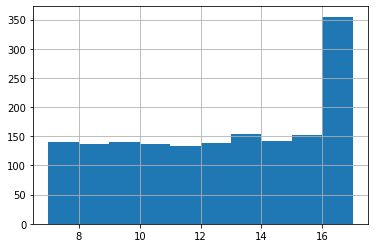

In [26]:
print(df_train.loc[(df_train['rez_esc'].notnull()) ,'age'].describe())
df_train.loc[df_train['rez_esc'].notnull(),'age'].hist()

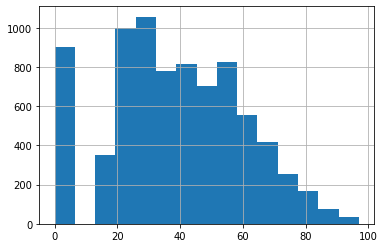

In [27]:
df_train.loc[(df_train['rez_esc'].isnull()) ,'age'].hist(bins=15)
plt.show()

In [28]:
# Number of instances that has a null and does fall withing the scooling years range
df_train.loc[(df_train['rez_esc'].isnull()) & ((df_train['age']>=7)&(df_train['age']<=17)),'age'].count()


1

In [29]:
df_train['rez_esc'].fillna(value=0, inplace=True)
print('Current Count Of Nulls In rez_esc:',df_train['rez_esc'].isnull().sum())

Current Count Of Nulls In rez_esc: 0


In [30]:
df_train['meaneduc'].fillna(value=0, inplace=True)
df_train['SQBmeaned'].fillna(value=0, inplace=True)
nulls_count = df_train.isnull().sum()
nulls_count[nulls_count>0]

Series([], dtype: int64)

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64


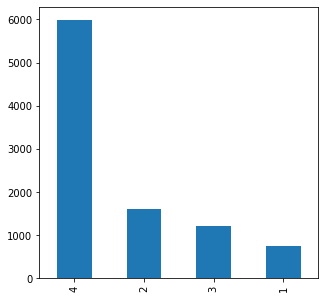

In [31]:
#Q3. Target Column Analysis (Check For Biases)

df_train['Target'].value_counts().plot.bar(figsize=(5,5))
print(df_train['Target'].value_counts())

In [32]:
#Q4 Check whether all members of the house have the same poverty level?
target_variance_by_household = df_train.groupby('idhogar')['Target'].nunique()
print('There are {} households where all the members does not have unique target values'.format(sum(target_variance_by_household>1)))



There are 85 households where all the members does not have unique target values


In [33]:
df_train.loc[df_train['idhogar']==target_variance_by_household[target_variance_by_household>2].index[0],['idhogar', 'parentesco1', 'Target']]


,idhogar,parentesco1,Target
6023,5c6f32bbc,1,3
6024,5c6f32bbc,0,4
6025,5c6f32bbc,0,2


In [34]:
# Count of households count of different targets for the same household
target_variance_by_household.value_counts()

1    2903
2      84
3       1
Name: Target, dtype: int64

In [35]:
#Q5. Check if there is a house without a family head?
households_with_target_variance = target_variance_by_household[target_variance_by_household>1].index
headless_households = []
headed_household = []
for house in target_variance_by_household.index:
    parentesco1sum = df_train.loc[df_train['idhogar']==house,'parentesco1'].sum()
    if parentesco1sum==0:
        headless_households.append(house)
    elif parentesco1sum ==1:
        headed_household.append(house)
print('There are {} households with no heads'.format(len(headless_households)))
print('There are {} households with heads'.format(len(headed_household)))


There are 15 households with no heads
There are 2973 households with heads


In [36]:
i=0
for headless in headless_households:
    for household in households_with_target_variance:
        if headless==household:
            i+=1
print('There are {} households with no head and have different Target value'.format(i))

There are 0 households with no head and have different Target value


In [37]:
#Q6. Set the poverty level of the members and the head of the house same in a family.
for hold in households_with_target_variance:
    df_train.loc[df_train['idhogar']==hold,'Target']= int(df_train.loc[(df_train['idhogar']==hold) & df_train['parentesco1']==1,'Target'])
    
target_variance_per_household = df_train.groupby('idhogar')['Target'].nunique()
print('Now, there are {} households where all the members does not have unique target values'.format(sum(target_variance_per_household>1)))


Now, there are 0 households where all the members does not have unique target values


In [38]:
#dropping unnecessary columns

drop_columns = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
                'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
print('Shape of training set before dropping squared columns',df_train.shape)
df_train.drop(columns= drop_columns, inplace=True)
print('Shape of training set after dropping squared columns',df_train.shape)

Shape of training set before dropping squared columns (9557, 143)
Shape of training set after dropping squared columns (9557, 134)


In [39]:
#Q8. Remove null value rows of the target variable.

df_train['Target'].isnull().sum()

0

In [40]:
#segregating household and individual variables
id_cols = ['Id', 'idhogar', 'Target'] # identity & Target columns

# Individual boolean variables
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

# Individual Ordered variables
ind_ord = ['rez_esc', 'escolari', 'age']

# Household boolean

house_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

# Household ordered

house_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

# Household continuous
house_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']


In [41]:
house_cols = id_cols + house_bool + house_ordered + house_cont
house_train_dataset = df_train.loc[df_train['parentesco1']==1,house_cols]
house_train_dataset.shape

(2973, 98)

In [42]:
#Correlation matrix
house_train_dataset_corr = house_train_dataset.corr()               # corr matrix
house_train_dataset_corr_shape = house_train_dataset_corr.shape     # shape of correlation matrix
true_bools = np.ones(house_train_dataset_corr_shape).astype(bool)   # True boolean matrix of shape mXn (shape as above) 
upper_tri_bools = np.triu(true_bools,k=1)                           # k=1 excludes the diagonal values as well
upper_house_train_dataset_corr = house_train_dataset_corr.where(upper_tri_bools) #Where cond is True, keep the original value
household_col_to_drop = [column for column in upper_house_train_dataset_corr.columns 
                         if any(abs(upper_house_train_dataset_corr[column])>0.95)]
household_col_to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [43]:
# coopele correlation data
coopele_corr_data = house_train_dataset_corr.loc['coopele']
coopele_corr_data[abs(coopele_corr_data)>.95]

public    -0.974788
coopele    1.000000
Name: coopele, dtype: float64

In [44]:
# area2 correlation data
area2_corr_data = house_train_dataset_corr.loc['area2']
area2_corr_data[abs(area2_corr_data)>.95]

area1   -1.0
area2    1.0
Name: area2, dtype: float64

In [45]:
tamhog_corr_data = house_train_dataset_corr.loc[abs(house_train_dataset_corr['tamhog'])>0.9
                                                ,abs(house_train_dataset_corr['tamhog'])>0.9]
tamhog_corr_data

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.996884,0.929237,0.996884,0.996884
tamhog,0.996884,1.000000,0.926667,1.000000,1.000000
tamviv,0.929237,0.926667,1.000000,0.926667,0.926667
hhsize,0.996884,1.000000,0.926667,1.000000,1.000000
hogar_total,0.996884,1.000000,0.926667,1.000000,1.000000


In [46]:
#individual level analysis
individual_cols = id_cols + ind_bool + ind_ord
ind_train_dataset = df_train[individual_cols]
ind_train_dataset.shape

(9557, 39)

In [47]:
# correlation matrix
individual_cols_corr = df_train[individual_cols].corr()
individual_cols_corr_shape = individual_cols_corr.shape
ind_true_bool = np.ones(individual_cols_corr_shape).astype(bool)
ind_upper_tri_bool = np.triu(ind_true_bool, k=1)
ind_upper_tri_corr = individual_cols_corr.where(ind_upper_tri_bool)
ind_cols_to_drop = [column for column in ind_upper_tri_corr.columns if any(abs(ind_upper_tri_corr[column])>0.95)]
ind_cols_to_drop

['female']

In [48]:
female_data_corr = individual_cols_corr.loc['female']
female_data_corr[abs(female_data_corr)>0.95]

male     -1.0
female    1.0
Name: female, dtype: float64

In [49]:
#Final drop list
final_drop_col = ['area2', 'female','tamhog', 'hogar_total', 'r4t3', 'Id', 'idhogar']

df_train.drop(columns=final_drop_col, inplace=True)
df_train.shape

(9557, 127)

In [50]:
#Model Training : data splitting
from sklearn.model_selection import train_test_split

X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [51]:
shapes = shapes= [X_train.shape,y_train.shape, X_test.shape,y_test.shape]
shapes

[(7645, 126), (7645,), (1912, 126), (1912,)]

In [52]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(
                                     n_estimators=100,
                                     oob_score = True,
                                     n_jobs = -1,
                                     criterion = 'gini')

print(RF_classifier)

RandomForestClassifier(n_jobs=-1, oob_score=True)


In [53]:
from sklearn import metrics
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
RF_classifier.fit(X_train, y_train)
y_pred_rf = RF_classifier.predict(X_test)

print('Random Forest R2 Score', metrics.r2_score(y_train,RF_classifier.predict(X_train)))
print('Random Forest OOB Score',RF_classifier.oob_score_ )


Random Forest R2 Score 1.0
Random Forest OOB Score 0.9416612164813604


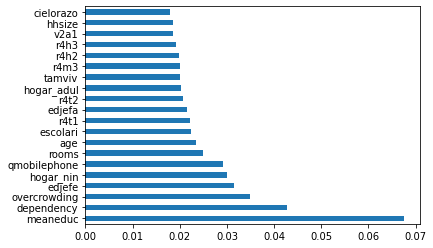

In [55]:
#Feature importance
features = pd.Series(RF_classifier.feature_importances_, index=X_train.columns)
features.nlargest(20).plot(kind='barh')
plt.show()

In [56]:
print(metrics.classification_report(y_test, y_pred_rf))
print(metrics.confusion_matrix(y_test, y_pred_rf))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, y_pred_rf, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

              precision    recall  f1-score   support

           1       0.98      0.89      0.93       169
           2       0.97      0.89      0.93       302
           3       0.99      0.81      0.89       257
           4       0.93      0.99      0.96      1184

    accuracy                           0.94      1912
   macro avg       0.97      0.90      0.93      1912
weighted avg       0.95      0.94      0.94      1912

[[ 151    1    0   17]
 [   1  270    1   30]
 [   2    2  207   46]
 [   0    6    1 1177]]
Accuracy of the model on Testing Sample Data: 0.94


In [57]:
#K-Fold cross validation

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
RF_classifier_kfold = RandomForestClassifier(n_estimators=100,
                                            n_jobs = -1, random_state=10
                                            )
RF_classifier_kfold.fit(X_train,y_train)
Accuracy_Values=cross_val_score(RF_classifier_kfold, X , y, cv=kfold, scoring='accuracy')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean()*100,2))


Accuracy values for 10-fold Cross Validation:
 [0.94508368 0.94142259 0.93772894 0.9466248  0.9544741 ]

Final Average Accuracy of the model: 94.51


In [58]:
#test Data cleaning and predictions

mapping = {'no':0,'yes':1}

# edjefe, edjefa, dependancy

df_test['edjefe'] = df_test['edjefe'].replace(mapping)
df_test['edjefa'] = df_test['edjefa'].replace(mapping)
df_test['dependency'] = df_test['dependency'].replace(mapping).astype(np.float64)

Text(0.5, 1.0, 'NaN Test Distribution Based On Ownership Type')

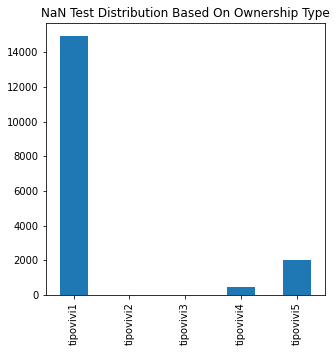

In [60]:
#ownership_columns = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']
df_test.loc[df_test['v2a1'].isnull(), ownership_columns].sum().plot.bar(figsize=(5,5))
plt.title('NaN Test Distribution Based On Ownership Type')

In [61]:
# Replacing Null values
df_test['v2a1'].fillna(value=0, inplace=True)
df_test['v18q1'].fillna(value=0, inplace=True)
df_test['rez_esc'].fillna(value=0, inplace=True)
df_test['meaneduc'].fillna(value=0, inplace=True)
df_test['SQBmeaned'].fillna(value=0, inplace=True)
test_nulls_count = df_test.isnull().sum()
test_nulls_count[test_nulls_count>0]

Series([], dtype: int64)

In [62]:
test_drop_columns = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
                    'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
                     'agesq','area2', 'female','tamhog', 'hogar_total', 'r4t3', 'Id', 'idhogar']
df_test.drop(columns=test_drop_columns, inplace=True)
df_test.shape

(23856, 126)

In [63]:
# K Fold model prediction
test_data_prediction_kfold = RF_classifier_kfold.predict(df_test)
test_data_prediction_kfold

array([4, 4, 4, ..., 4, 4, 2])